In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

data_size = 4000

feature_cols = ['EnrolledElectiveBefore', 'GradeAvgFromPreviousElective',
                            'Grade', 'Major', 'Class', 'GradePerm']
target_cols = [f'Course{id+1}' for id in range(5)]

feature_0 = np.random.randint(low=2, size=data_size) # EnrolledElectiveBefore

feature_1 = np.random.normal(loc=60, scale=15, size=data_size) # GradeAvgFromPreviousElective
feature_1 = np.where(feature_1 > 100, 100, feature_1)
feature_1 = np.where(feature_1 < 0, 0, feature_1)
feature_1 = np.where(feature_0 == 0, 0, feature_1)

feature_2 = np.random.normal(loc=70, scale=10, size=data_size) # Grade
feature_2 = np.where(feature_2 > 100, 100, feature_2)
feature_2 = np.where(feature_2 < 0, 0, feature_2)

feature_3 = np.random.choice([1, 2, 3], size=data_size) # Major
feature_4 = np.random.choice([1, 2, 3, 4], size=data_size) # Class
feature_5 = np.random.permutation(feature_2) # GradePerm

all_features = np.array([feature_0, feature_1, feature_2, feature_3,
                         feature_4, feature_5]).swapaxes(0, 1)

features_df = pd.DataFrame(all_features, columns=feature_cols)

targets_list = np.empty((0, 5))
for _, row in features_df.iterrows():
    target_row = np.zeros(5)
    if row['GradeAvgFromPreviousElective'] > 0:
        course_grades = (0.5 * row['GradeAvgFromPreviousElective'] + 0.5 * row['Grade'] +
                        np.random.uniform(low=-10, high=10, size=5))
    else:
        course_grades = row['Grade'] + np.random.normal(loc=10, scale=2, size=5)
    course_grades = np.where(course_grades < 0, 0, course_grades)
    course_grades = np.where(course_grades > 100, 100, course_grades)
    if row['EnrolledElectiveBefore'] == 0:
        selected_course = np.random.choice([2, 3, 4])
        target_row[selected_course] = course_grades[selected_course]
        targets_list = np.vstack([targets_list, target_row])
        continue
    if row['Class'] == 0:
        selected_course = np.random.choice([0, 1])
        target_row[selected_course] = course_grades[selected_course]
        targets_list = np.vstack([targets_list, target_row])
        continue
    if (row['Major'] > 2) & (row['Class'] > 2):
        selected_course = np.random.choice([0, 2, 3, 4], size=2)
        target_row[selected_course] = course_grades[selected_course]
        targets_list = np.vstack([targets_list, target_row])
        continue
    if row['Grade'] < 70:
        selected_course = np.random.choice([1, 2, 3], size=2)
        target_row[selected_course] = course_grades[selected_course]
        targets_list = np.vstack([targets_list, target_row])
        continue
    selected_course = np.random.choice([0, 1, 2, 3, 4], size=2)
    target_row[selected_course] = course_grades[selected_course]
    targets_list = np.vstack([targets_list, target_row])

targets_list = np.empty((0, 5))
for _, row in features_df.iterrows():
    if row['GradeAvgFromPreviousElective'] > 0:
        course_grades = (0.5 * row['GradeAvgFromPreviousElective'] +
                         0.5 * row['Grade'] + np.random.uniform(-10, 10, 5))
    else:
        course_grades = row['Grade'] + np.random.normal(10, 2, 5)
    course_grades = np.clip(course_grades, 0, 100)

    if row['EnrolledElectiveBefore'] == 0:
        selected_course = np.random.choice([2, 3, 4])
    elif row['Class'] == 0:
        selected_course = np.random.choice([0, 1])
    elif row['Major'] > 2 and row['Class'] > 2:
        selected_course = np.random.choice([0, 2, 3, 4], size=2)
    elif row['Grade'] < 70:
        selected_course = np.random.choice([1, 2, 3], size=2)
    else:
        selected_course = np.random.choice([0, 1, 2, 3, 4], size=2)

    target_row = np.zeros(5)
    target_row[selected_course] = course_grades[selected_course]
    targets_list = np.vstack([targets_list, target_row])

targets_df = pd.DataFrame(targets_list, columns=target_cols)

features_df
targets_df

full_df = pd.concat([features_df, targets_df], axis=1)

rstate = 23
x_train, x_test, y_train, y_test = train_test_split(features_df, targets_df, test_size = 0.3, random_state=rstate)

In [2]:
nplots = 25
results = np.zeros((nplots-1, 2))
for md in range(1, nplots):
    regressor = DecisionTreeRegressor(max_depth=md, min_samples_leaf=1, random_state=rstate)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    acc = mean_squared_error(y_test, y_pred)
    results[md-1, 0] = acc
    print('Depth: ', md)
    print('DT Accuracy: ', acc)
    cumsums = np.array([sum(y_pred[i] > 0.0001) for i in range(len(y_pred))])
    infeasible = np.sum(cumsums >= 3)
    results[md-1, 1] = infeasible
    print('Number of infeasible predictions for DT: ', infeasible)
    print()

Depth:  1
DT Accuracy:  922.7514735238577
Number of infeasible predictions for DT:  1200

Depth:  2
DT Accuracy:  895.7941803527262
Number of infeasible predictions for DT:  1200

Depth:  3
DT Accuracy:  886.505701211419
Number of infeasible predictions for DT:  1200

Depth:  4
DT Accuracy:  878.3206343985828
Number of infeasible predictions for DT:  1192

Depth:  5
DT Accuracy:  891.8325048680774
Number of infeasible predictions for DT:  1188

Depth:  6
DT Accuracy:  925.1051931735752
Number of infeasible predictions for DT:  1165

Depth:  7
DT Accuracy:  973.0051198177944
Number of infeasible predictions for DT:  1130

Depth:  8
DT Accuracy:  1029.3940758226775
Number of infeasible predictions for DT:  1050

Depth:  9
DT Accuracy:  1083.0069494007025
Number of infeasible predictions for DT:  956

Depth:  10
DT Accuracy:  1169.1579597456823
Number of infeasible predictions for DT:  841

Depth:  11
DT Accuracy:  1238.9975739097067
Number of infeasible predictions for DT:  737

Depth:  

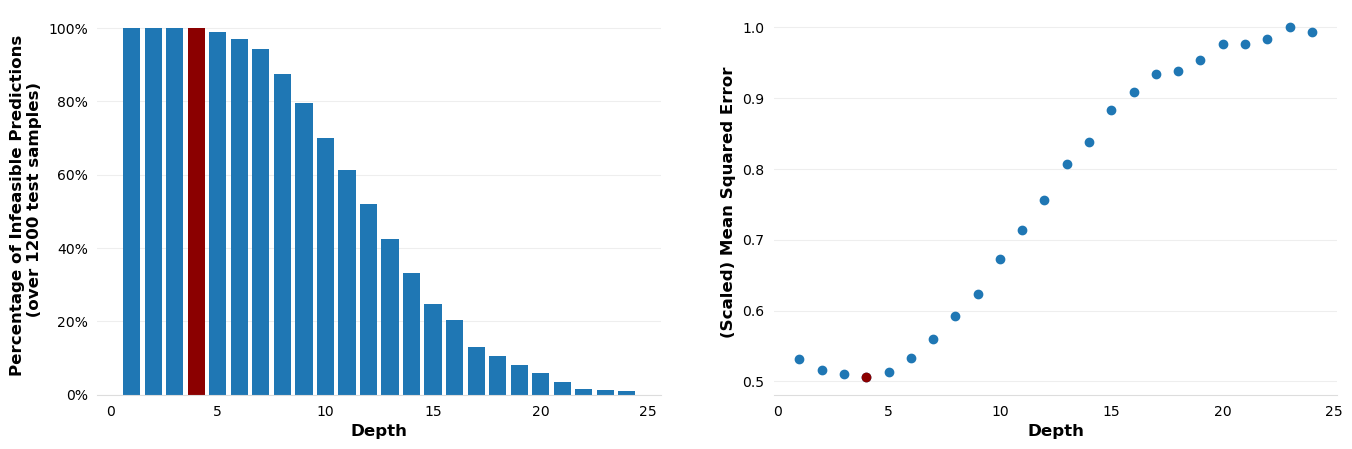

In [3]:
y0 = results[:, 0] / np.max(results[:, 0])
y1 = 100*(results[:, 1] / len(y_test))
fig, (ax2, ax1) = plt.subplots(1 ,2, figsize=(16, 5))
# fig.suptitle('Mean Squared Error vs. Feasibility for Different Tree Depths')
x = np.arange(1, nplots)
y = y0
ax1.scatter(x, y)
ax1.set_xlabel('Depth', weight='bold', fontsize=12)
ax1.set_ylabel('(Scaled) Mean Squared Error', weight='bold', fontsize=12)
y = y1
ax2.bar(x, y)
ax2.set_xlabel('Depth', weight='bold', fontsize=12)
ax2.set_ylabel('Percentage of Infeasible Predictions \n (over 1200 test samples)', weight='bold', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
min_mse_pt = np.argmin(results[:, 0])+1
ax1.scatter(min_mse_pt, np.min(y0), color='darkred')
ax2.bar(min_mse_pt, y1[min_mse_pt]+1.0, color='darkred')

# Axis formatting.
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax1.tick_params(bottom=False, left=False)
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax1.xaxis.grid(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.tick_params(bottom=False, left=False)
ax2.set_axisbelow(True)
ax2.yaxis.grid(True, color='#EEEEEE')
ax2.xaxis.grid(False)

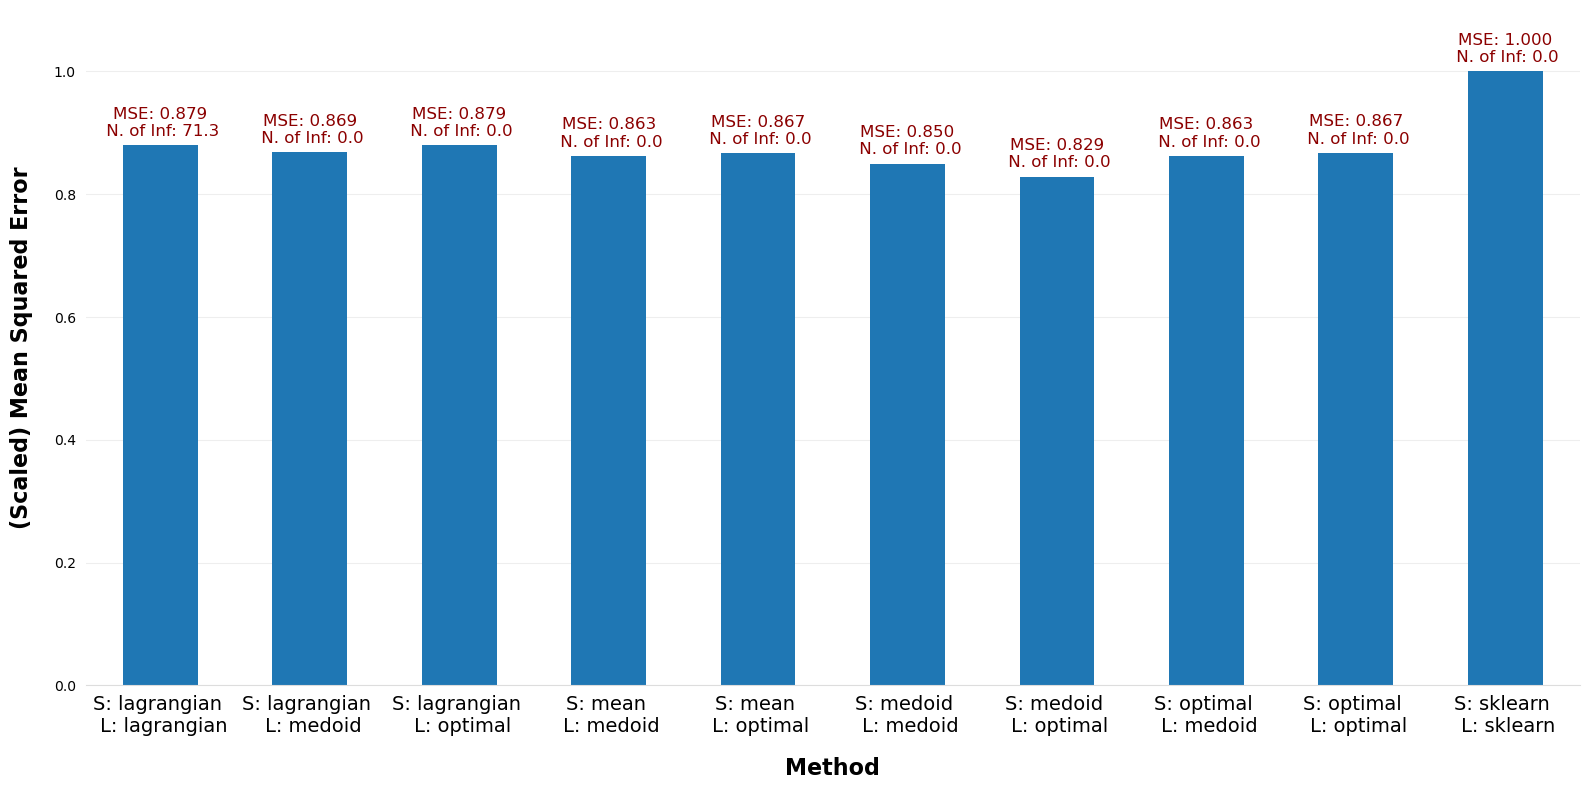

In [4]:
perf_df = pd.read_csv('data/results/perf_df_all.csv')

report_metric = 'mse'
dataset = 'cars'

report_cols = [x for x in perf_df.columns if (x.endswith(report_metric))]
perf_df_dataset = perf_df[perf_df['data'] == dataset]

perf_df_plot = perf_df_dataset.groupby(['prediction_method', 'prediction_method_leaf'])[report_cols].mean()
perf_df_plot['run'] = [f'S: {x[0]} \n L: {x[1]}' for x in perf_df_plot.index]

perf_df_plot['mse'] = perf_df_plot['mse'] / perf_df_plot['mse'].max()

fig, ax = plt.subplots(figsize=(16, 8))

ax = perf_df_plot.mse.plot.bar()

# ax.set_title(f"Dataset: {dataset.upper()}", weight='bold', fontsize=20) # \n Metric: {report_metric.upper()}")
ax.set_ylim((0, perf_df_plot.mse.max() * 1.1))
ax.set_xlabel("Method", weight='bold', labelpad=15, fontsize=16)
ax.set_ylabel("(Scaled) Mean Squared Error", weight='bold', labelpad=15, fontsize=16)
ax.set_xticklabels(perf_df_plot.run, color='black', fontsize=14)
ax.tick_params(axis='x', labelrotation=0)


# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

rects = ax.patches
perf_df_plot_nof_inf = perf_df_dataset.groupby(['prediction_method', 'prediction_method_leaf'])[
     'nof_infeasibilities'].mean()

labels = ['MSE: ' + f'{round(perf_df_plot.mse.values[i], 3):.3f}' + '\n N. of Inf: ' + f'{round(perf_df_plot_nof_inf.values[i], 1):.1f}' for i in
            range(len(perf_df_plot.mse.values))]

bar_color = ax.patches[0].get_facecolor()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, label, ha="center", va="bottom", color='darkred', fontsize=12)

fig.tight_layout()